In [1]:
%pylab inline
from scipy.special import ellipk as K
from scipy.optimize import fsolve as solve
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
import matplotlib


Populating the interactive namespace from numpy and matplotlib


In [2]:
#СИ
c = 3.*1e8

# a = 0.5*1e-3
W = 1.*1e-3
S = 1.e-3
b = (2.*W + S)
e0 = 8.85418*1e-12
# e0 = 1.
e1 = 10.2
e2 = 1.

h1 = 0.503*1e-3
h2 = 10000000*1e-3
h3 = h1
# h3 = 1e9
h4 = h2

t = 0.018*1e-3

код был неправельным, там таки гиперболические синусы

In [3]:
class CPW():
    c = 3.*1e8
    e0 = 8.85418*1e-12
    
    def __init__(self, S, W, h, e, ctype):
        self.S = S
        self.W = W
        self.h1 = h
        self.h3 = h
        self.e1 = e
        self.type = ctype
        self.b = 2.*W + S
        
        if ctype == '1_g':#Coplanar Waveguide With Ground 
            self.e2 = 1.
            self.h2 = 1e14
            self.h4 = 1e14
        elif ctype == '2_g':# CPW sandwiched between two  dielectric substrates
            self.e2 = e
            self.h2 = h
            self.h4 = h
        elif ctype == '3_g':# CPW sandwiched between two  dielectric substrates
            self.e2 = 1
#             self.h2 = 3e-3
#             self.h4 = 3e-3
            self.h2 = 1e-3
            self.h4 = 1e-3
        else:
            print('type err')
            
            
    def k34(self, h):
        return np.tanh(np.pi*self.S/(4.*h))/np.tanh(np.pi*self.b/(4.*h))
    def k34_(self, h):
        return np.sqrt(1. - self.k34(h)**2)
    
    def k12(self, h):
        return np.sinh(np.pi*self.S/(4.*h))/np.sinh(np.pi*self.b/(4.*h))
    def k12_(self, h):
        return np.sqrt(1. - self.k12(h)**2)

    def frac34(self,h):
        return K(self.k34(h))/K(self.k34_(h))
    def frac12(self,h):
        return K(self.k12(h))/K(self.k12_(h))
    
    def e_eff(self):
        return 1. + self.frac12(self.h1)/(self.frac34(self.h3)+self.frac34(self.h4))*(self.e1 - 1.) + \
                    self.frac12(self.h2)/(self.frac34(self.h3)+self.frac34(self.h4))*(self.e2 - 1.)
        
    def Z_0(self):
        return 60.*np.pi/np.sqrt(self.e_eff())/(self.frac34(self.h3)+self.frac34(self.h4))
    

In [6]:
res = CPW(S = 1e-3, W = 1e-3, h = 0.50e-3, e = 10, ctype = '1_g')
res.Z_0()

57.91801087607329

In [12]:
def find_50(b,h,e,ctype):
    dmin = 125.e-6
    def func(S,h,e,ctype):
        W = (b - S)/2.
        res = CPW(S, W, h, e, ctype)
        return res.Z_0() - 50.
    
#     S_arr = np.linspace(dmin,b-dmin*2,50)
#     fig, ax = plt.subplots()
#     ax.plot(S_arr, func(S_arr,h,e,ctype))
#     plt.show()
    
  
    
    init = 1.e-6
    
#     print(f'S = {solve(func,init,args = (h,e,ctype),xtol = 1e-4)[0]*1e3},W = {(b - solve(func,init,args = (h,e,ctype),xtol = 1e-4)[0])*1e3/2.}, b = {b*1e3}' )
    return solve(func,init,args = (h,e,ctype),xtol = 1e-4)[0]*1e3
    

In [13]:
b = 0.1e-3
dmin = 125.e-3
result = find_50(b = b,h = 0.503e-3, e = 10.2, ctype = '2_g')
print(result)

# if res > dmin and (b*1e3 - res)/2. > dmin:
#         print(res)
        

0.03096478869145005


In [29]:
b_arr3 = np.array([])
arr3 = np.linspace(125e-6,2e-3,100)
result3 = np.array([])
dmin = 75.e-3
for i in arr3:
    res3 = find_50(b = i,h = 0.503e-3, e = 10.2, ctype = '3_g')
#     if res > dmin and (i*1e3 - res)/2. > dmin:
    b_arr3 = np.append(b_arr3, i)
    result3 = np.append(result3, res3)
        


In [15]:
b_arr4 = np.array([])
arr4 = np.linspace(125e-6,2e-3,100)
result4 = np.array([])
dmin = 75.e-3
for i in arr4:
    res4 = find_50(b = i,h = 0.503e-3, e = 10.2, ctype = '3_g')
#     if res > dmin and (i*1e3 - res)/2. > dmin:
    b_arr4 = np.append(b_arr4, i)
    result4 = np.append(result4, res4)
        

In [16]:
S_sample = [260]
W_sample = [190]
b_sample = [640]

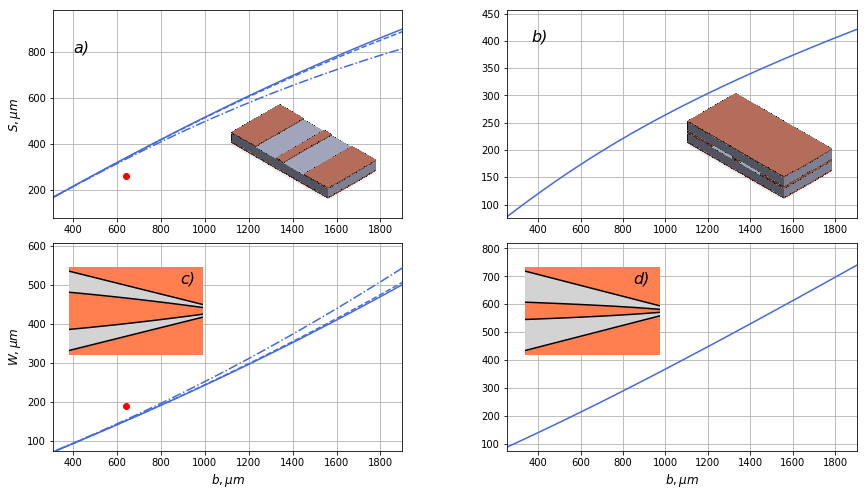

In [40]:
b_arr = np.array([])
arr = np.linspace(125e-6,2e-3,100)
result = np.array([])
dmin = 75.e-3
for i in arr:
    res = find_50(b = i,h = 0.503e-3, e = 10.2, ctype = '1_g')
#     if res > dmin and (i*1e3 - res)/2. > dmin:
    b_arr = np.append(b_arr, i)
    result = np.append(result, res)
        
b_arr2 = np.array([])
arr2 = np.linspace(125e-6,2e-3,100)
result2 = np.array([])
dmin = 1.e-3
for i in arr2:
    res2 = find_50(b = i,h = 0.503e-3, e = 10.2, ctype = '2_g')
#     if res > dmin and (i*1e3 - res)/2. > dmin:
    b_arr2 = np.append(b_arr2, i)
    result2 = np.append(result2, res2)
    
    
col = '#4169E1'
fig, ax = plt.subplots(2,2)
ax[0][0].plot(b_arr*1e6, result*1e3,color=col)
ax[0][0].plot(b_arr3*1e6, result3*1e3, linestyle='--',color=col)
ax[0][0].plot(b_arr4*1e6, result4*1e3, linestyle='-.',color=col)
ax[0][0].plot(b_sample, S_sample, 'o' ,color='r')
ax[0][0].set_ylabel(r'$S, \mu m$',fontsize = 'large')
ax[0][0].grid(True)
ax[0][0].set_ylim(75,)
ax[0][0].set_xlim(310,1900)

ax[1][0].plot(b_arr*1e6, (b_arr*1e6 - result*1e3)/2.,color=col)
ax[1][0].plot(b_arr3*1e6, (b_arr3*1e6 - result3*1e3)/2.,linestyle='--',color=col)
ax[1][0].plot(b_arr4*1e6, (b_arr4*1e6 - result4*1e3)/2.,linestyle='-.',color=col)
ax[1][0].plot(b_sample, W_sample, 'o' ,color='r')
ax[1][0].set_xlabel(r'$b, \mu m$',fontsize = 'large')
ax[1][0].set_ylabel(r'$W, \mu m$',fontsize = 'large')
ax[1][0].grid(True)
ax[1][0].set_ylim(75,)
ax[1][0].set_xlim(310,1900)

ax[0][1].plot(b_arr2*1e6, result2*1e3,color=col)
ax[0][1].grid(True)
ax[0][1].set_ylim(75,)
ax[0][1].set_xlim(255,1900)

ax[1][1].plot(b_arr2*1e6, (b_arr2*1e6 - result2*1e3)/2.,color=col)
ax[1][1].set_xlabel(r'$b, \mu m$',fontsize = 'large')
ax[1][1].grid(True)
ax[1][1].set_ylim(75,)
ax[1][1].set_xlim(255,1900)


ax_1 = fig.add_axes([.14, .29, .13, .15], facecolor='w')
ax_1.plot(arr*1e6,S_arr_1/2.,color='#000000')
ax_1.plot(arr*1e6,W_arr_1 + S_arr_1/2.,color='#000000')
ax_1.plot(arr*1e6,-S_arr_1/2.,color='#000000')
ax_1.plot(arr*1e6,-W_arr_1 - S_arr_1/2.,color='#000000')
ax_1.set_xlim(2000,310)
ax_1.set_ylim(-1100,1100)

ax_1.fill_between(arr*1e6, -S_arr_1/2.,S_arr_1/2., facecolor='#FF7F50', alpha=1)
ax_1.fill_between(arr*1e6, S_arr_1/2.,W_arr_1 + S_arr_1/2., facecolor='#D3D3D3', alpha=1)
ax_1.fill_between(arr*1e6, -W_arr_1 - S_arr_1/2., -S_arr_1/2., facecolor='#D3D3D3', alpha=1)
ax_1.fill_between(arr*1e6, W_arr_1 + S_arr_1/2.,2000, facecolor='#FF7F50', alpha=1)
ax_1.fill_between(arr*1e6,-2000, -W_arr_1 - S_arr_1/2., facecolor='#FF7F50', alpha=1)


ax_1.set_xticks([])
ax_1.set_yticks([])
ax_1.axis('off')


ax_2 = fig.add_axes([.580, .29, .13, .15], facecolor='w')
ax_2.plot(arr*1e6,S_arr_2/2.,color='#000000')
ax_2.plot(arr*1e6,W_arr_2 + S_arr_2/2.,color='#000000')
ax_2.plot(arr*1e6,-S_arr_2/2.,color='#000000')
ax_2.plot(arr*1e6,-W_arr_2 - S_arr_2/2.,color='#000000')
ax_2.set_xlim(2000,255)
ax_2.set_ylim(-1100,1100)

ax_2.fill_between(arr*1e6, -S_arr_2/2.,S_arr_2/2., facecolor='#FF7F50', alpha=1)
ax_2.fill_between(arr*1e6, S_arr_2/2.,W_arr_2 + S_arr_2/2., facecolor='#D3D3D3', alpha=1)
ax_2.fill_between(arr*1e6, -W_arr_2 - S_arr_2/2., -S_arr_2/2., facecolor='#D3D3D3', alpha=1)
ax_2.fill_between(arr*1e6, W_arr_2 + S_arr_2/2.,2000, facecolor='#FF7F50', alpha=1)
ax_2.fill_between(arr*1e6,-2000, -W_arr_2 - S_arr_2/2., facecolor='#FF7F50', alpha=1)

ax_2.set_xticks([])
ax_2.set_yticks([])
ax_2.axis('off')

ax_3 = fig.add_axes([.240, .510, .25, .25], facecolor='w')
ax_3.patch.set_alpha(0.)
ax_3.axis('off')
pic3 = mpimg.imread('type_1.png')
ax_3.imshow(pic3)

ax_4 = fig.add_axes([.680, .510, .25, .25], facecolor='w')
ax_4.patch.set_alpha(0.)
ax_4.axis('off')
pic4 = mpimg.imread('type_2.png')
ax_4.imshow(pic4)

fig.subplots_adjust(wspace=0.3)
fig.subplots_adjust(hspace=0.12)
fig.set_figwidth(16*0.90)    
fig.set_figheight(9*0.90)

ax_1.text(600 ,700,'c)',fontsize = 16,fontstyle = 'oblique')
ax_2.text(600 ,700,'d)',fontsize = 16,fontstyle = 'oblique')
ax[0][0].text(400 ,800,'a)',fontsize = 16,fontstyle = 'oblique')
ax[0][1].text(370 ,400,'b)',fontsize = 16,fontstyle = 'oblique')
# fig.savefig('CPW_graph', dpi = 300)
plt.show()

In [18]:
S_arr_1 = result*1e3
W_arr_1 = (b_arr*1e6 - result*1e3)/2.
S_arr_2 = result2*1e3
W_arr_2 = (b_arr2*1e6 - result2*1e3)/2.


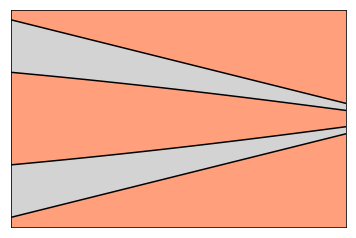

In [19]:
fig, ax_1 = plt.subplots()
# ax_1 = fig.add_axes([.65, .6, .2, .2], facecolor='w')
ax_1.plot(arr*1e6,S_arr_1/2.,color='#000000')
ax_1.plot(arr*1e6,W_arr_1 + S_arr_1/2.,color='#000000')
ax_1.plot(arr*1e6,-S_arr_1/2.,color='#000000')
ax_1.plot(arr*1e6,-W_arr_1 - S_arr_1/2.,color='#000000')
ax_1.set_xlim(2000,310)
ax_1.set_ylim(-1100,1100)

ax_1.fill_between(arr*1e6, -S_arr_1/2.,S_arr_1/2., facecolor='#FF7F50', alpha=0.75)
ax_1.fill_between(arr*1e6, S_arr_1/2.,W_arr_1 + S_arr_1/2., facecolor='#D3D3D3', alpha=1)
ax_1.fill_between(arr*1e6, -W_arr_1 - S_arr_1/2., -S_arr_1/2., facecolor='#D3D3D3', alpha=1)
ax_1.fill_between(arr*1e6, W_arr_1 + S_arr_1/2.,2000, facecolor='#FF7F50', alpha=0.75)
ax_1.fill_between(arr*1e6,-2000, -W_arr_1 - S_arr_1/2., facecolor='#FF7F50', alpha=0.75)

ax_1.set_xticks([])
ax_1.set_yticks([])
plt.show()

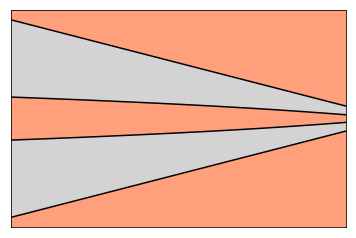

In [20]:
fig, ax_2 = plt.subplots()
# ax_2 = fig.add_axes([.65, .6, .2, .2], facecolor='w')
ax_2.plot(arr*1e6,S_arr_2/2.,color='#000000')
ax_2.plot(arr*1e6,W_arr_2 + S_arr_2/2.,color='#000000')
ax_2.plot(arr*1e6,-S_arr_2/2.,color='#000000')
ax_2.plot(arr*1e6,-W_arr_2 - S_arr_2/2.,color='#000000')
ax_2.set_xlim(2000,255)
ax_2.set_ylim(-1100,1100)

ax_2.fill_between(arr*1e6, -S_arr_2/2.,S_arr_2/2., facecolor='#FF7F50', alpha=0.75)
ax_2.fill_between(arr*1e6, S_arr_2/2.,W_arr_2 + S_arr_2/2., facecolor='#D3D3D3', alpha=1)
ax_2.fill_between(arr*1e6, -W_arr_2 - S_arr_2/2., -S_arr_2/2., facecolor='#D3D3D3', alpha=1)
ax_2.fill_between(arr*1e6, W_arr_2 + S_arr_2/2.,2000, facecolor='#FF7F50', alpha=0.75)
ax_2.fill_between(arr*1e6,-2000, -W_arr_2 - S_arr_2/2., facecolor='#FF7F50', alpha=0.75)

ax_2.set_xticks([])
ax_2.set_yticks([])
plt.show()

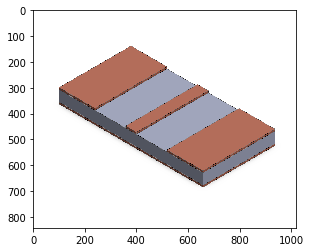

In [25]:
fig, ax = plt.subplots()

pic1 = mpimg.imread('type_1.png')

ax.imshow(pic1)
plt.show()